## Tesseract command-line

1. Current version [here pre-installed via Ubuntu PPA](https://github.com/rue-a/ocrd_python_codespace/blob/master/.devcontainer/setup.sh) according to [installation instructions for ocrd_tesserocr](https://github.com/OCR-D/ocrd_tesserocr#from-pypi-and-ppa).

In [1]:
!tesseract --version
!ocrd-tesserocr-recognize --version

tesseract 5.3.1-24-g63639
 leptonica-1.82.0
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.2) : libpng 1.6.37 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE4.1
 Found libarchive 3.2.2 zlib/1.2.11 liblzma/5.2.2 bz2lib/1.0.6 liblz4/1.7.1
 Found libcurl/7.58.0 NSS/3.35 zlib/1.2.11 libidn2/2.0.4 libpsl/0.19.1 (+libidn2/2.0.4) nghttp2/1.30.0 librtmp/2.3
Version 0.17.0 (tesseract 5.3.1-24-g63639), ocrd/core 2.52.0


2. Get our [previous image example](https://upload.wikimedia.org/wikipedia/commons/0/0e/Weisse_Scherzhafte_Lieder_003.jpg)

In [2]:
!wget -O input.jpg https://upload.wikimedia.org/wikipedia/commons/0/0e/Weisse_Scherzhafte_Lieder_003.jpg

--2023-06-30 03:32:19--  https://upload.wikimedia.org/wikipedia/commons/0/0e/Weisse_Scherzhafte_Lieder_003.jpg
Auflösen des Hostnamens upload.wikimedia.org (upload.wikimedia.org) … 91.198.174.208, 2620:0:862:ed1a::2:b
Verbindungsaufbau zu upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: 620995 (606K) [image/jpeg]
Wird in »input.jpg« gespeichert.

input.jpg           100%[===================>] 606,44K   599KB/s    in 1,0s    

2023-06-30 03:32:21 (599 KB/s) - »input.jpg« gespeichert [620995/620995]



![](input.jpg)

3. Run Tesseract with default model (for English, synthetically trained):

In [3]:
!tesseract input.jpg output_eng -l eng
!cat output_eng.txt

Estimating resolution as 809
Detected 40 diacritics
gw tweis in der That nicht, twas

id) Der Welt, indem ich ihr die.

Lieder ibergebe, fur ein Compli-
ment maden foll, Gie wird unju-
frieden fey, Daf man fie mit folchert
Tandeleyen tberhauft, und ich werde
nichtd daranf zu antworten twiffen,
und 8 Zeit genug bereuen. Aber
was ift der Autorftols nicht fir eine
wunderfiche Sache? Man glanbe att:
fangs Klos zu feinem Zeitvcrtreibe gu
foielen, man gefallt fi dq, und wie bald
bildet man fich nidt ein, man mitffe
auch der swigigen Welt gefallen?
Man lake drucken, man swird geta-
delt: man nimme 8 iibel, (chrent tiber
den Verfall des Gefchmacés, und 8
felt nicht viel, daB man feine Lefer nicht
fieber gar fir THhoren Halt. Und wer
tar dev groste Thor id) will die

MY 2 Frage


4. Try another, more fitting pretrained model:

In [5]:
!tesseract input.jpg output_Fraktur -l Fraktur
!cat output_Fraktur.txt

Estimating resolution as 809
Detected 40 diacritics
GW weis in der That nicht, was

ih der Welt, indem ich ihr die.

Lieder übergebe, für ein Compli-
ment machen ſoll, Sie wird unzu-
frieden ſeyn, daß man ſie mit ſolchen
Tändeleyen überhäuft, und ich werde
nichts darauf zu antworten wiſſen,
und es Zeit genug bereuen. Aber
was iſ der Autorſtolz nicht für eine
wunderliche Sache? Man glaubt an-
fangs blos zu ſeinem Zeitvertreibe zu
ſpielen, man gefällt <, und wie bald
bildet man ſich nicht ein, man müſſe
auch der wißigen Welt gefallen?
Man läßt drucken, man wird geta-
delt: man nimmt es übel, ſchreyt über
den Verfall des Geſchmacks, und es
fehlt nicht viel, daß man ſeine Lefer nicht
lieber gar für Thoren hält. Und wer
war der größte Thor? ich will die

A 2 Frage


5. download model [trained by OCR community](https://github.com/tesseract-ocr/tesstrain/wiki) on [GT from scanned Fraktur prints](http://doi.org/10.5281/zenodo.1344132):

In [7]:
!ocrd resmgr download ocrd-tesserocr-recognize frak2021.traineddata

INFO ocrd.cli.resmgr - Downloading registered resource 'frak2021.traineddata' (https://ub-backup.bib.uni-mannheim.de/~stweil/tesstrain/frak2021/tessdata_best/frak2021-0.905.traineddata)
  [------------------------------------]    0%
INFO ocrd.cli.resmgr - File /home/xbert/unsortiert/arbeit/slub/ocrd_python_codespace/.venv/share/tessdata/frak2021.traineddata already exists but --overwrite is not set
INFO ocrd.cli.resmgr - Use in parameters as 'frak2021'


6. Try `frak2021` model, combined with other models (as fallback):

In [8]:
!tesseract input.jpg output_frak2021 -l frak2021+Fraktur+deu
!cat output_frak2021.txt

Error opening data file /home/xbert/unsortiert/arbeit/slub/ocrd_python_codespace/.venv/share/tessdata/deu.traineddata
Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory.
Failed loading language 'deu'
Estimating resolution as 809
Detected 40 diacritics
GW weis in der That nicht, was

ih der Welt, indem ich ihr dieſe

Lieder übergebe, für ein Compli⸗
ment machen ſoll, Sie wird unzu-
frieden ſeyn, daß man ſie mit ſolchen
Taͤndeleyen überhäuft, und ich werde
nichts darauf zu antworten wiſſen,
und es Zeit genug bereuen. Aber
was iſt der Autorſtolz nicht für eine
wunderliche Sache? Man glaubt an⸗
fangs blos zu ſeinem Zeitvertreibe zu
ſpielen, man gefällt ſi <, und wie bald
bildet man ſich nicht ein, man müſſe
auch der witzigen Welt gefallen?
Man läßt drucken, man wird geta-
delt: man nimmt es übel, ſchreyt über
den Verfall des Geſchmacks, und es
fehlt nicht viel, daß man ſeine Leſer nicht
lieber gar für Thoren hält. Und wer
war der größte 47 ich wil

## Tesseract Python API (tesserocr)

1. [Documentation](https://tesseract-ocr.github.io/) covers many aspects, including [C/C++ API](https://tesseract-ocr.github.io/tessapi/5.x/), 
which heavily builds upon [Leptonica](http://www.leptonica.org/) data structures.

More high-level API is available in **Python bindings**, which use [PIL for image processing](https://pillow.readthedocs.io/):
- [pytesseract](https://github.com/madmaze/pytesseract)
- [**tesserocr**](https://github.com/sirfz/tesserocr/)

mode: RGB
info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
size: (2339, 3308)


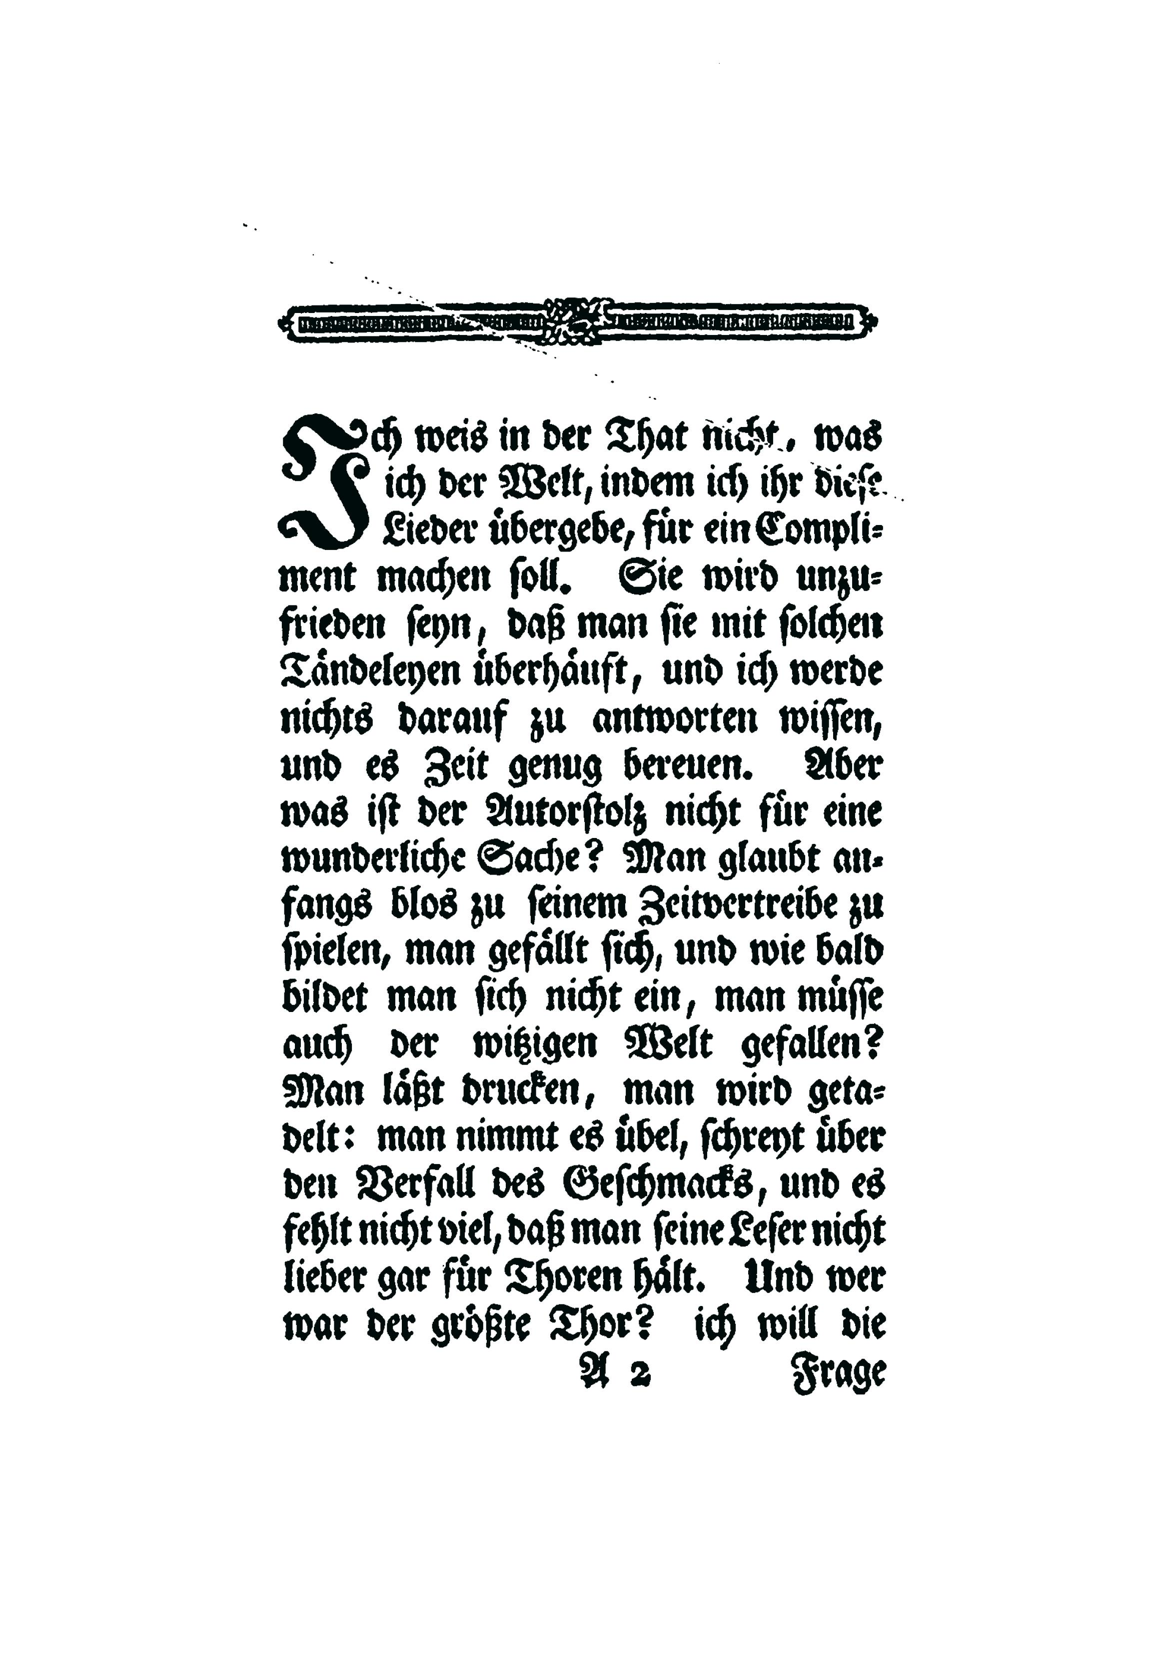

In [15]:
from PIL import Image
from IPython.display import display
img = Image.open('input.jpg')
print(f"mode: {img.mode}")
print(f"info: {img.info}")
print(f"size: {img.size}")
display(img.resize([dim//2 for dim in img.size]))

In [10]:
import tesserocr
help(tesserocr)

Help on module tesserocr:

NAME
    tesserocr - Python wrapper around the Tesseract-OCR C++ API

DESCRIPTION
    This module provides a wrapper class :class:`PyTessBaseAPI` to call
    Tesseract API methods. See :class:`PyTessBaseAPI` for details.
    
    In addition, helper functions are provided for ocr operations:
    
    >>> text = image_to_text(Image.open('./image.jpg').convert('L'), lang='eng')
    >>> text = file_to_text('./image.jpg', psm=PSM.AUTO)
    >>> print tesseract_version()
    tesseract 3.04.00
        leptonica-1.72
        libjpeg 8d (libjpeg-turbo 1.3.0) : libpng 1.2.51 : libtiff 4.0.3 : zlib 1.2.8
    >>> get_languages()
    ('/usr/share/tesseract-ocr/tessdata/',
     ['eng', 'osd', 'equ'])

CLASSES
    builtins.object
        PyChoiceIterator
        PyPageIterator
            PyLTRResultIterator
                PyResultIterator
        PyTessBaseAPI
    _Enum(builtins.object)
        DIR
        Justification
        OEM
        Orientation
        PSM
        

2. Using tesserocr (simplest case):

In [11]:
print(tesserocr.file_to_text('input.jpg', lang='frak2021+Fraktur+deu'))

GW weis in der That nicht, was

ih der Welt, indem ich ihr dieſe

Lieder übergebe, für ein Compli⸗
ment machen ſoll, Sie wird unzu-
frieden ſeyn, daß man ſie mit ſolchen
Taͤndeleyen überhäuft, und ich werde
nichts darauf zu antworten wiſſen,
und es Zeit genug bereuen. Aber
was iſt der Autorſtolz nicht für eine
wunderliche Sache? Man glaubt an⸗
fangs blos zu ſeinem Zeitvertreibe zu
ſpielen, man gefällt ſi <, und wie bald
bildet man ſich nicht ein, man müſſe
auch der witzigen Welt gefallen?
Man läßt drucken, man wird geta-
delt: man nimmt es übel, ſchreyt über
den Verfall des Geſchmacks, und es
fehlt nicht viel, daß man ſeine Leſer nicht
lieber gar für Thoren hält. Und wer
war der größte 47 ich will die

A 2 Frage



(or equivalently:)

In [12]:
print(tesserocr.image_to_text(img, lang='frak2021+Fraktur+deu'))

GW weis in der That nicht, was

ich der Welt, indem ich ihr dieſe

Lieder übergebe, für ein Compli⸗
ment machen ſoll, Sie wird unzu-
frieden ſeyn, daß man ſie mit ſolchen
Taͤndeleyen überhäuft, und ich werde
nichts darauf zu antworten wiſſen,
und es Zeit genug bereuen. Aber
was iſt der Autorſtolz nicht für eine
wunderliche Sache? Man glaubt an⸗
fangs blos zu ſeinem Zeitvertreibe zu
ſpielen, man gefällt ſi <, und wie bald
bildet man ſich nicht ein, man müſſe
auch der witzigen Welt gefallen?
Man läßt drucken, man wird geta-
delt: man nimmt es übel, ſchreyt über
den Verfall des Geſchmacks, und es
fehlt nicht viel, daß man ſeine Leſer nicht
lieber gar für Thoren hält. Und wer
war der größte Thor? ich will die

A 2 Frage



See currently installed models:

In [13]:
tesserocr.get_languages()

('/home/xbert/unsortiert/arbeit/slub/ocrd_python_codespace/.venv/share/tessdata/',
 ['Fraktur', 'eng', 'equ', 'frak2021', 'osd'])

3. Using tesserocr (stateful API):

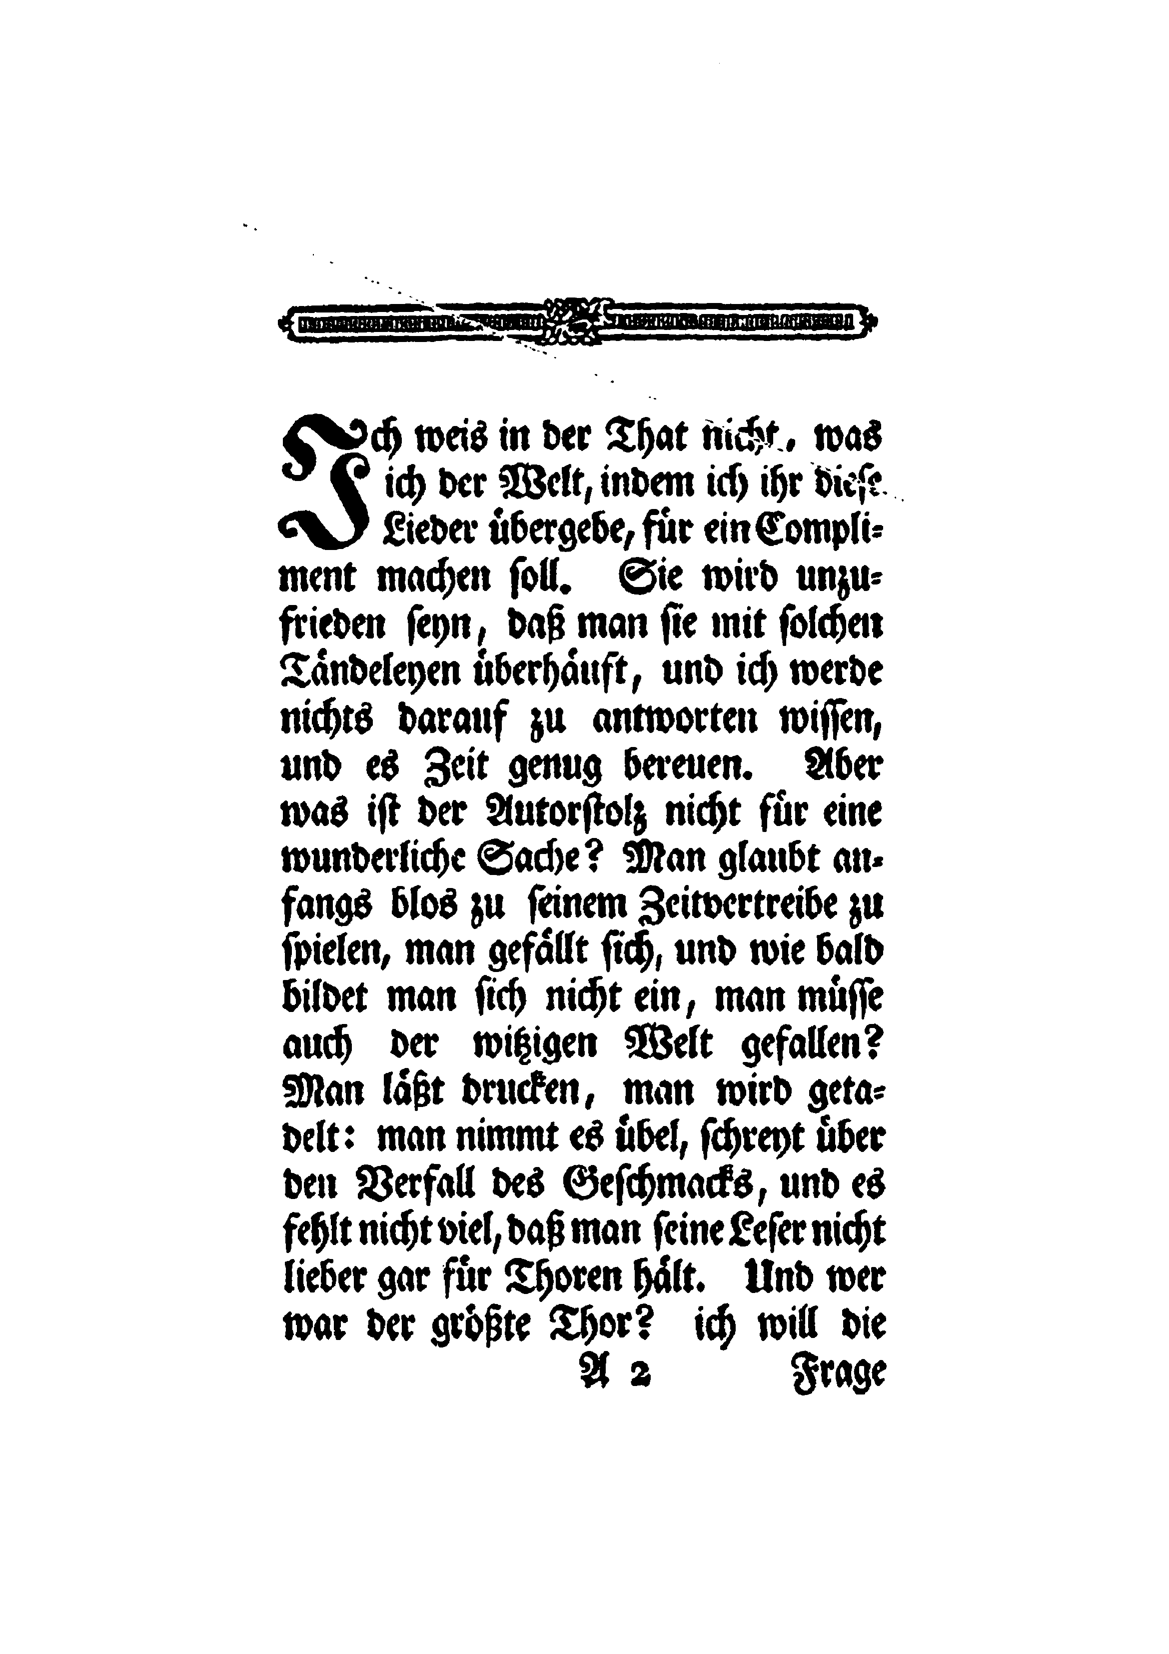

GW weis in der That nicht, was

ich der Welt, indem ich ihr dieſe

Lieder übergebe, für ein Compli⸗
ment machen ſoll, Sie wird unzu-
frieden ſeyn, daß man ſie mit ſolchen
Taͤndeleyen überhäuft, und ich werde
nichts darauf zu antworten wiſſen,
und es Zeit genug bereuen. Aber
was iſt der Autorſtolz nicht für eine
wunderliche Sache? Man glaubt an⸗
fangs blos zu ſeinem Zeitvertreibe zu
ſpielen, man gefällt ſi <, und wie bald
bildet man ſich nicht ein, man müſſe
auch der witzigen Welt gefallen?
Man läßt drucken, man wird geta-
delt: man nimmt es übel, ſchreyt über
den Verfall des Geſchmacks, und es
fehlt nicht viel, daß man ſeine Leſer nicht
lieber gar für Thoren hält. Und wer
war der größte Thor? ich will die

A 2 Frage



In [16]:
with tesserocr.PyTessBaseAPI(lang='frak2021+Fraktur+deu') as tess:
    tess.SetImage(img)
    tess.SetPageSegMode(tesserocr.PSM.AUTO)
    tess.Recognize()
    # show result from internal binarization
    display(tess.GetThresholdedImage().resize([dim//2 for dim in img.size]))
    # show overall text result
    print(tess.GetUTF8Text())

4. Using tesserocr (result tree structure):

block type: FLOWING_IMAGE


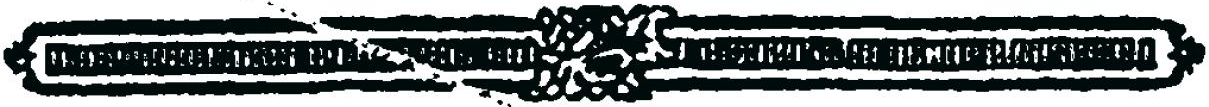

block type: FLOWING_TEXT


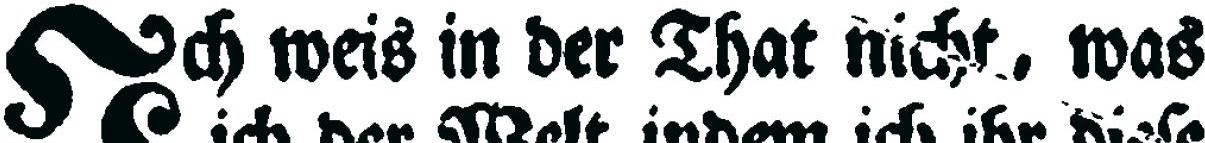

GW weis in der That nicht, was


confidence: 71.37864685058594%%


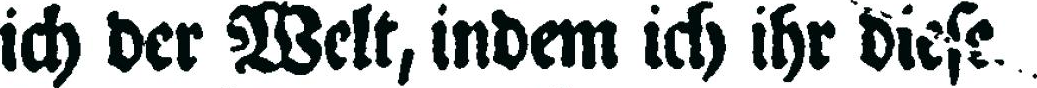

ich der Welt, indem ich ihr dieſe


confidence: 94.54052734375%%


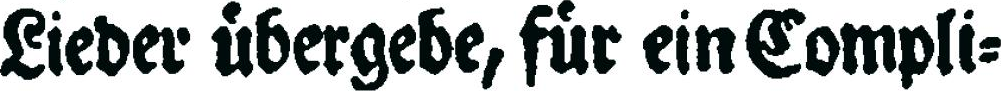

Lieder übergebe, für ein Compli⸗

confidence: 88.50617218017578%%


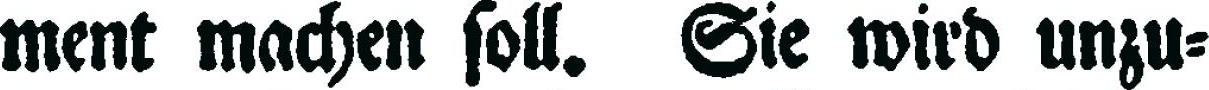

ment machen ſoll, Sie wird unzu-

confidence: 92.337158203125%%


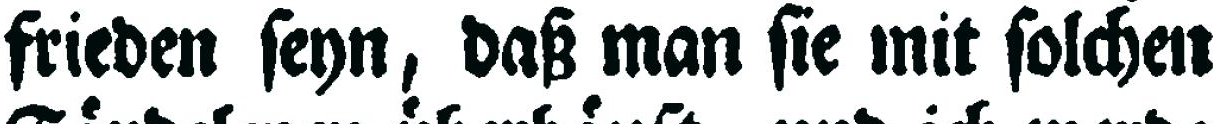

frieden ſeyn, daß man ſie mit ſolchen

confidence: 93.23326110839844%%


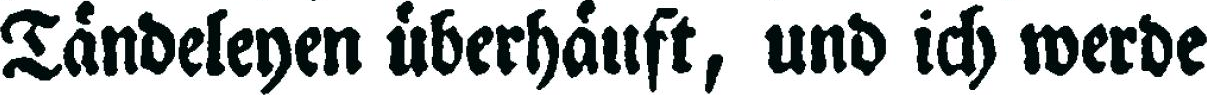

Taͤndeleyen überhäuft, und ich werde

confidence: 92.022705078125%%


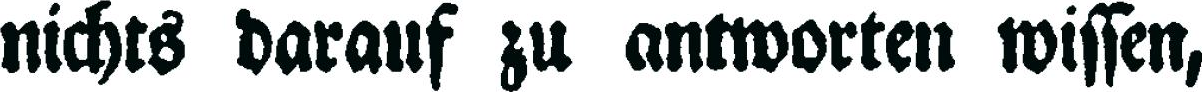

nichts darauf zu antworten wiſſen,

confidence: 95.9683837890625%%


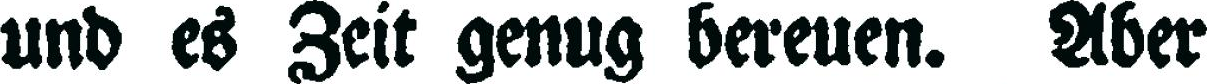

und es Zeit genug bereuen. Aber

confidence: 95.85931396484375%%


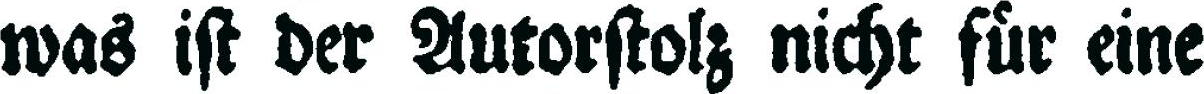

was iſt der Autorſtolz nicht für eine

confidence: 94.8833999633789%%


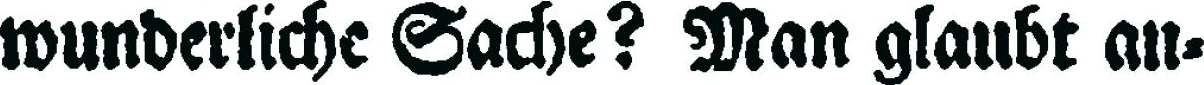

wunderliche Sache? Man glaubt an⸗

confidence: 92.65235137939453%%


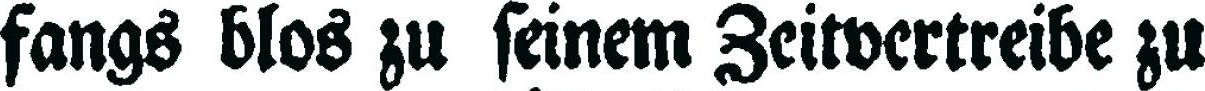

fangs blos zu ſeinem Zeitvertreibe zu

confidence: 95.2249755859375%%


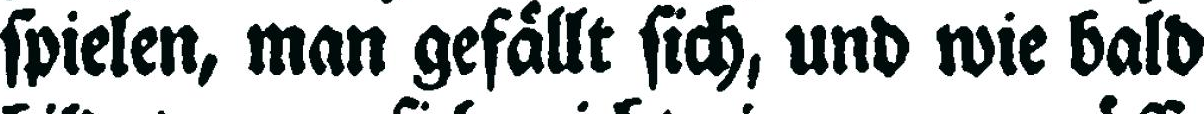

ſpielen, man gefällt ſi <, und wie bald

confidence: 88.06222534179688%%


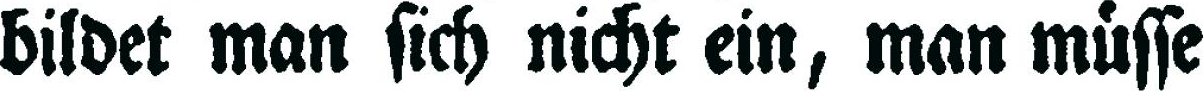

bildet man ſich nicht ein, man müſſe

confidence: 93.426025390625%%


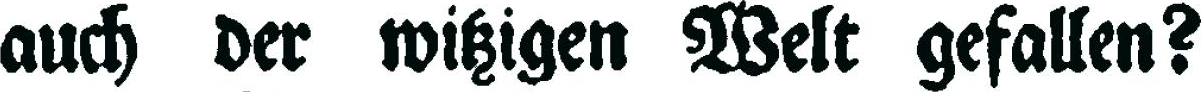

auch der witzigen Welt gefallen?

confidence: 94.40703582763672%%


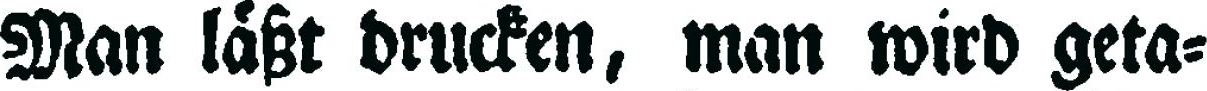

Man läßt drucken, man wird geta-

confidence: 87.58956146240234%%


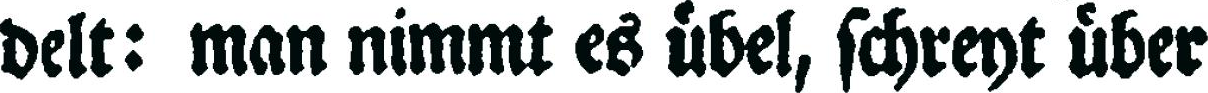

delt: man nimmt es übel, ſchreyt über

confidence: 92.29005432128906%%


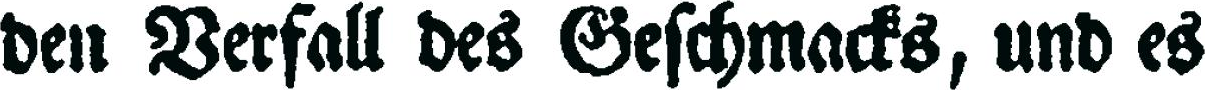

den Verfall des Geſchmacks, und es

confidence: 96.19881439208984%%


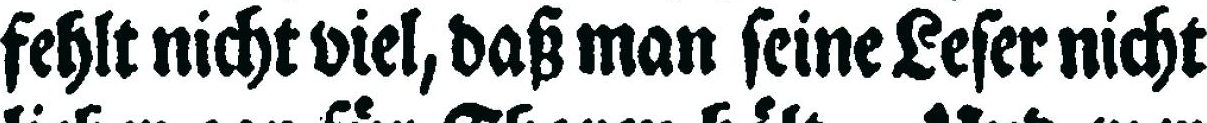

fehlt nicht viel, daß man ſeine Leſer nicht

confidence: 91.58653259277344%%


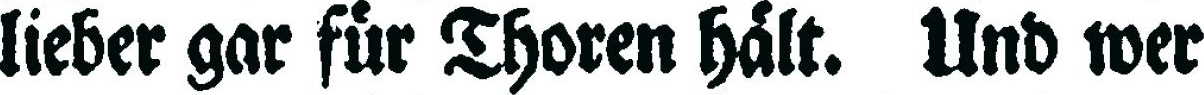

lieber gar für Thoren hält. Und wer

confidence: 94.78875732421875%%


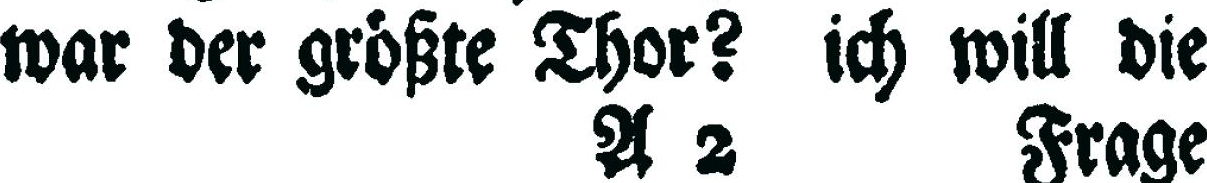

war der größte Thor? ich will die


confidence: 83.94035339355469%%


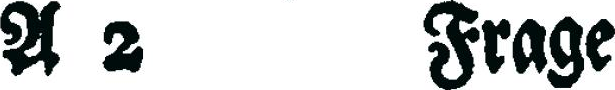

A 2 Frage


confidence: 92.38015747070312%%


In [21]:
with tesserocr.PyTessBaseAPI(lang='frak2021+Fraktur+deu') as tess:
    tess.SetImage(img)
    tess.SetPageSegMode(tesserocr.PSM.AUTO)
    tess.Recognize()
    page = tess.GetIterator()
    for block in tesserocr.iterate_level(page, tesserocr.RIL.BLOCK):
        blocktype = block.BlockType()
        blocktypestr = dict(map(reversed,tesserocr.PT.__dict__.items()))[blocktype]
        print(f"block type: {blocktypestr}")
        if not blocktypestr.endswith('_TEXT'):
            blockbox = block.BoundingBox(tesserocr.RIL.BLOCK)
            blockimg = img.crop(blockbox)
            display(blockimg)
            continue
        for para in tesserocr.iterate_level(block, tesserocr.RIL.PARA):
            for line in tesserocr.iterate_level(para, tesserocr.RIL.TEXTLINE):
                linebox = line.BoundingBox(tesserocr.RIL.TEXTLINE)
                lineimg = img.crop(linebox)
                display(lineimg)
                print(line.GetUTF8Text(tesserocr.RIL.TEXTLINE))
                print(f"confidence: {line.Confidence(tesserocr.RIL.TEXTLINE)}%%")



## Tesseract OCR-D command-line (ocrd_tesserocr)

covered [elsewhere](https://github.com/slub/ocrd-demo-2023-06-30)…

## Tesseract OCR-D Python API (ocrd_tesserocr)

In [24]:
import ocrd
import ocrd_utils
import ocrd_tesserocr
ocrd_utils.initLogging()
ocrd_utils.getLogger('processor.TesserocrRecognize').setLevel('INFO')
ocrd_utils.getLogger('PIL').setLevel('ERROR')
res = ocrd.Resolver()
ws = res.workspace_from_url('https://github.com/OCR-D/assets/raw/master/data/kant_aufklaerung_1784/data/mets.xml', download=True)
rec = ocrd_tesserocr.TesserocrRecognize(ws, 
                                        input_file_grp='OCR-D-IMG', 
                                        output_file_grp='OCR-D-OCR',
                                        parameter={'segmentation_level': 'region', 'textequiv_level': 'glyph', 'model': 'frak2021'})
rec.process()
ws.save_mets()

CRITICAL root - initLogging was called multiple times. Source of latest call:
CRITICAL root -   File "/tmp/ipykernel_11843/2457937580.py", line 4, in <module>
CRITICAL root -     ocrd_utils.initLogging()
INFO processor.TesserocrRecognize - Using model 'frak2021' in /home/xbert/unsortiert/arbeit/slub/ocrd_python_codespace/.venv/share/tessdata/ for recognition at the glyph level
INFO processor.TesserocrRecognize - INPUT FILE 0 / PHYS_0017
INFO processor.TesserocrRecognize - Page 'PHYS_0017' images will use 300 DPI from image meta-data
INFO processor.TesserocrRecognize - Processing page 'PHYS_0017'
libpng warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'rXYZ': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'gXYZ': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'bXYZ': ICC profile tag start not a multiple of 4
libpng warning: i

In [44]:
import ocrd_modelfactory
import ocrd_models.constants
res = ws.find_files(file_grp='OCR-D-OCR', mimetype=ocrd_utils.MIMETYPE_PAGE)
res0 = next(res)
page0, pagetree0, _, _ = ocrd_modelfactory.page_from_file(res0, with_tree=True)
text0 = pagetree0.xpath('//page:Glyph/page:TextEquiv[1]/page:Unicode', namespaces=ocrd_models.constants.NAMESPACES)
print(''.join(glyph.text for glyph in text0))

BerliniſcheMonatsſchrift.1784.ZwoͤlftesStuk.December.I.BeantwortungderFrage:WasiſtAufklaͤrung?(S.Decemb.1783.S.716.)AufelärungiſtderAusgangdesMen⸗ſchenausſeinerſelbſtverſchuldetenUnmuͤn⸗digkeit.UnmuͤndigkeitiſtdasUnvermoͤgen,ſichſeinesVerſtandesohneLeitungeinesanderenzubedlenen.SelbſtverſchuldetiſtdieſeUnmün⸗digkett,wenndieUrſachederſelbennichtamMan⸗geldesVerſtandes,ſondernderEntſchließungunddesMuthesliegt,ſichſeinerohneLeitungeinesandernzubedienen.Sapereaude!HabeMuüthdichdeineseigenenVerſtandeszubedienen!iſtal⸗ſoderWahlſpruchderAufklärung.FaulheitundFeigheitſinddieUrſachen,warumeinſogroßerTheilderMenſchen,nachdemſiedieNaturlaͤngſtvonfremderLeitungfreigeſprochenD.Monatsſchr.IV.B.6.St.Hh(na-
